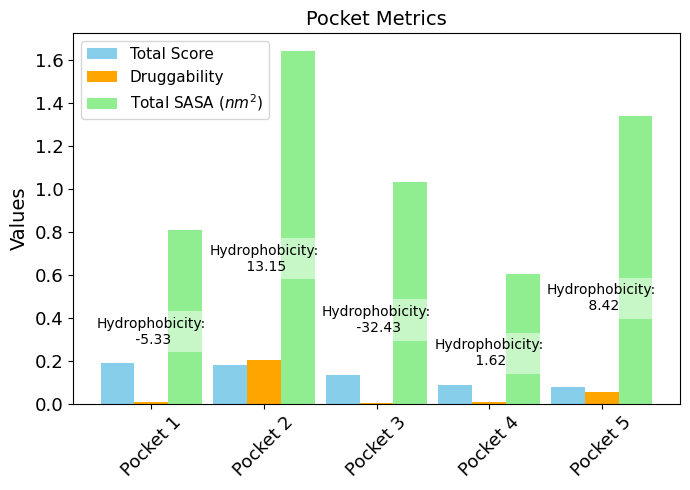

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to parse the pocket data from the file
def parse_pocket_data(file_path):
    pockets = {}
    current_pocket = None
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith("Pocket"):
                current_pocket = line.split(":")[0].strip()
                pockets[current_pocket] = {}
            elif ":" in line:
                key, value = line.split(":", 1)
                key = key.strip()
                value = float(value.strip())
                if key in ["Score", "Druggability Score", "Total SASA", "Hydrophobicity score"]:
                    pockets[current_pocket][key] = value
    return pockets

# File path
file_path = "/home/ibrahim/data/Molecular_mechanics/6UMV_out/6UMV_info.txt"
output_file = "/home/ibrahim/data/Molecular_mechanics/6UMV_out/Pockets_plot.png"

# Parse the data
pockets = parse_pocket_data(file_path)

# Prepare data for plotting
pocket_names = list(pockets.keys())
score = [pockets[pocket]["Score"] for pocket in pocket_names]
druggability_score = [pockets[pocket]["Druggability Score"] for pocket in pocket_names]
total_sasa = [pockets[pocket]["Total SASA"]/100 for pocket in pocket_names]
hydrophobicity_score = [pockets[pocket]["Hydrophobicity score"] for pocket in pocket_names]

# Set width of bars
bar_width = 0.3
x = np.arange(len(pocket_names))

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(7, 5))
bar1 = ax.bar(x - bar_width, score, width=bar_width, label="Total Score", color="skyblue")
bar2 = ax.bar(x, druggability_score, width=bar_width, label="Druggability", color="orange")
bar3 = ax.bar(x + bar_width, total_sasa, width=bar_width, label=r"Total SASA $(nm^2)$", color="lightgreen")

# Add text labels for hydrophobicity scores in the middle of each pocket group
for i, v in enumerate(hydrophobicity_score):
    avg_height = (score[i] + druggability_score[i] + total_sasa[i]) / 3
    ax.text(x[i], avg_height, f"Hydrophobicity:\n {v:.2f}", ha='center', va='center', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Add titles, labels, and legend
ax.set_title("Pocket Metrics", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(pocket_names, rotation=45, fontsize=13)
ax.legend(fontsize=11, loc="upper left")
plt.yticks(fontsize=13)
plt.tight_layout()

# Save the plot
plt.savefig("fpocket_metric.png", dpi=450)

# Show the plot
plt.show()


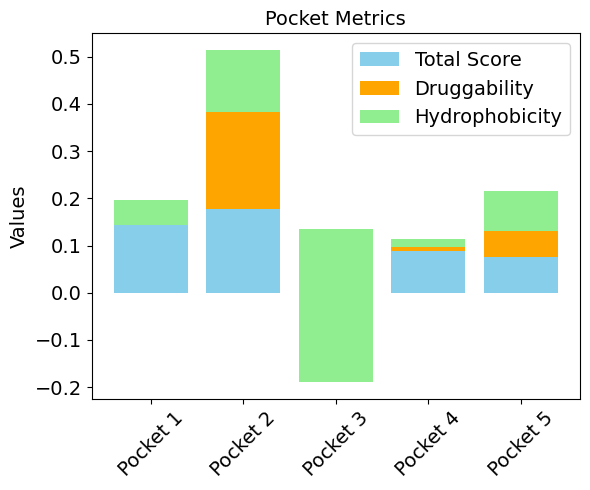

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

# Function to parse the pocket data from the file
def parse_pocket_data(file_path, output_file='Pockets_plot'):
    pockets = {}
    current_pocket = None
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith("Pocket"):
                current_pocket = line.split(":")[0].strip()
                pockets[current_pocket] = {}
            elif ":" in line:
                key, value = line.split(":", 1)
                key = key.strip()
                value = float(value.strip())
                if key in ["Score", "Druggability Score", "Hydrophobicity score"]:
                    pockets[current_pocket][key] = value
    return pockets

# File path
file_path = "/home/ibrahim/data/Molecular_mechanics/6UMV_out/6UMV_info.txt"

# Parse the data
pockets = parse_pocket_data(file_path)

# Prepare data for plotting
pocket_names = list(pockets.keys())
score = [pockets[pocket]["Score"] for pocket in pocket_names]
druggability_score = [pockets[pocket]["Druggability Score"] for pocket in pocket_names]
total_sasa = [pockets[pocket]["Hydrophobicity score"] for pocket in pocket_names]

# Create the stacked bar plot
fig, ax = This code snippet is creating a stacked bar plot to visualize different metrics for pockets parsed from a file. Here's a breakdown of what each part of the code is doing:
plt.subplots(figsize=(6, 5))
bar1 = ax.bar(pocket_names, score, label="Total Score", color="skyblue")
bar2 = ax.bar(pocket_names, druggability_score, bottom=score, label="Druggability", color="orange")
bar3 = ax.bar(pocket_names, total_sasa, bottom=np.array(score) + np.array(druggability_score), label="Hydrophobicity", color="lightgreen")

# Add titles, labels, and legend
ax.set_title("Pocket Metrics", fontsize=14)
#ax.set_xlabel("Pocket", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
ax.legend(fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

In [75]:
# get the list Residue index in pocket 2
def extract_unique_residues(pdb_file):
    unique_residues = set()
    
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("ATOM") or line.startswith("HETATM"):
                residue_number = int(line[22:26].strip())
                unique_residues.add(residue_number)
    
    return sorted(unique_residues)

# Usage
pdb_filename = "/home/ibrahim/data/Molecular_mechanics/6UMV_out/pockets/pocket2_atm.pdb"  # Replace with your actual PDB file
unique_residues = extract_unique_residues(pdb_filename)
print(unique_residues)

[78, 79, 80, 81, 84, 85, 89, 90, 91, 93, 95, 96, 97]


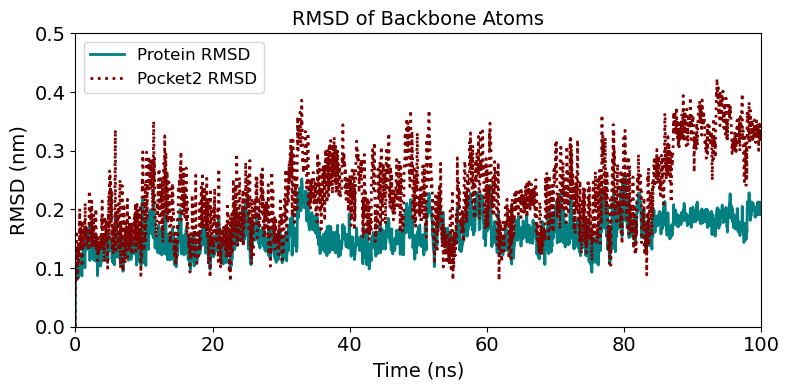

In [ ]:

def read_xvg(file_path):
    """
    Reads an .xvg file into a numpy array using numpy.loadtxt.
    Skips lines starting with '#' or '@' (comments and metadata).
    """
    return np.loadtxt(file_path, comments=['#', '@'])

def plot_combined_rmsd(protein_data, pocket_data, output_file="RMSD"):
    """
    Plots both protein RMSD and active pocket RMSD on the same graph.
    """
    # Extract time and RMSD values for protein and pocket
    protein_time = protein_data[:, 0]
    protein_rmsd = protein_data[:, 1]
    pocket_time = pocket_data[:, 0]
    pocket_rmsd = pocket_data[:, 1]

    # Create the plot
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=protein_time, y=protein_rmsd, label="Protein RMSD", color="teal", linewidth=2)
    sns.lineplot(x=pocket_time, y=pocket_rmsd, label="Pocket2 RMSD", color="maroon", linestyle=":", linewidth=2)

    # Add titles, labels, and grid
    plt.title("RMSD of Backbone Atoms", fontsize=14)
    plt.xlabel("Time (ns)", fontsize=14)
    plt.ylabel("RMSD (nm)", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(0,100)
    plt.ylim(0,0.5)
    
    plt.grid(False)

    # Add legend
    plt.legend(fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.savefig(output_file, dpi=450, bbox_inches='tight', format='png')
    plt.show()

def main():
    # File paths for the RMSD files
    protein_rmsd_file = "6UMV-rmsd2.xvg"
    pocket_rmsd_file = "6UMV-rmsd_active.xvg"

    # Read the data from the .xvg files into numpy arrays
    protein_rmsd_data = read_xvg(protein_rmsd_file)
    pocket_rmsd_data = read_xvg(pocket_rmsd_file)

    # Plot the combined RMSD data
    plot_combined_rmsd(protein_rmsd_data, pocket_rmsd_data)

if __name__ == "__main__":
    main()

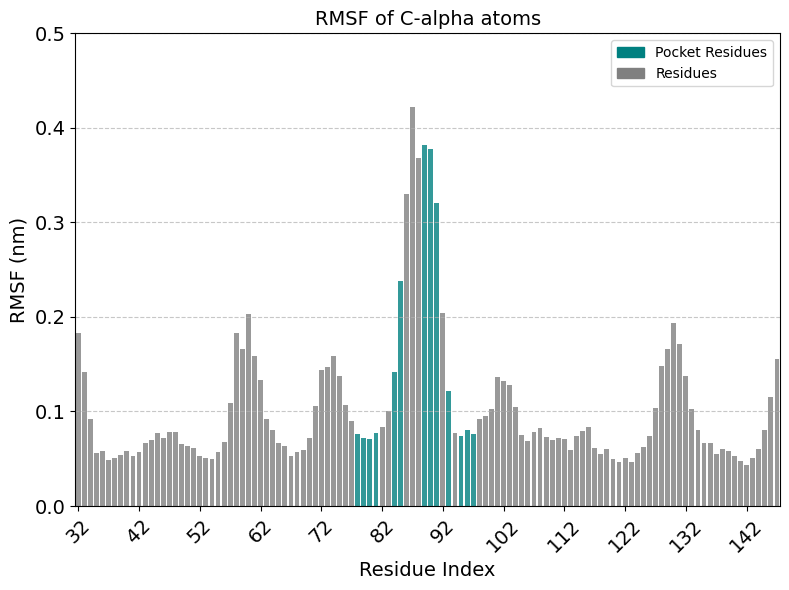

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the pocket residues
pocket = [78, 79, 80, 81, 84, 85, 89, 90, 91, 93, 95, 96, 97]

def plot_rmsf(data, output_file="RMSF"):
    """
    Plots RMSF per residue with custom x-axis ticks and highlighted pocket residues.
    """
    residues = data[:, 0]
    rmsf = data[:, 1]

    # Create a color array: 'coral' for pocket residues, 'black' otherwise
    colors = ["teal" if res in pocket else "grey" for res in residues]

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.bar(residues, rmsf, color=colors, width=0.8, alpha=0.8)

    # Customize x-axis ticks to show residue numbers in intervals of 15
    xticks = np.arange(min(residues), max(residues) + 1, 10)
    plt.xticks(ticks=xticks, labels=[int(x) for x in xticks], rotation=45)

    # Add titles, labels, and grid
    plt.title("RMSF of C-alpha atoms", fontsize=14)
    plt.xlabel("Residue Index", fontsize=14)
    plt.ylabel("RMSF (nm)", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(31.5,147.5)
    plt.ylim(0,0.5)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor="teal", edgecolor="teal", label="Pocket Residues"),
        Patch(facecolor="gray", edgecolor="gray", label="Residues")
    ]
    plt.legend(handles=legend_elements, fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.savefig(output_file, dpi=450, bbox_inches='tight', format='png')
    plt.show()


rmsf_file = "6UMV-rmsf.xvg"

# Read the data from the .xvg file into numpy arrays
rmsf_data = read_xvg(rmsf_file)

# Plot the RMSF data
plot_rmsf(rmsf_data)


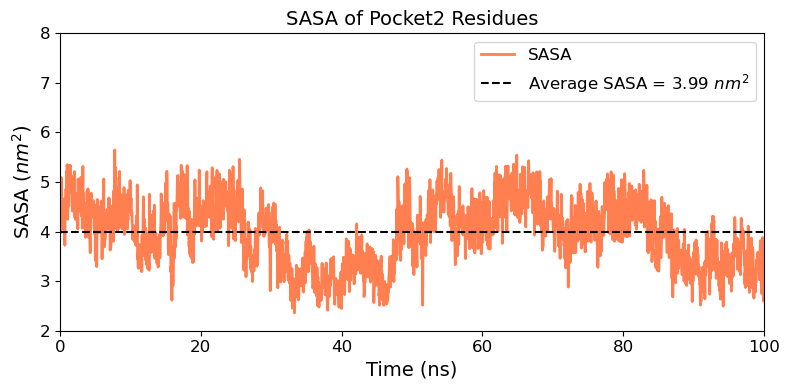

In [72]:
def plot_sasa(data, output_file="SASA-pocket"):
    """
    Plots SASA with an average line overlaid.
    """
    # Extract time and SASA values
    time = data[:, 0] / 1000  # Convert time from ps to ns
    sasa = data[:, 2]

    # Calculate the average SASA value
    avg_sasa = np.mean(sasa)

    # Create the plot
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=time, y=sasa, label="SASA", color="coral", linewidth=2)

    # Add the average line (black, dotted)
    plt.axhline(y=avg_sasa, color="black", linestyle="--", linewidth=1.5, label=f"Average SASA = {avg_sasa:.2f} $nm^2$")

    # Add titles, labels, and grid
    plt.title("SASA of Pocket2 Residues", fontsize=14)
    plt.xlabel("Time (ns)", fontsize=14)
    plt.ylabel(r"SASA $(nm^2)$", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, 100)  # Set x-axis limits
    plt.ylim(2, 8)   # Set y-axis limits
    plt.grid(False)

    # Add legend
    plt.legend(fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.savefig(output_file, dpi=450, bbox_inches='tight', format='png')
    plt.show()

    
sasa_file = "6UMV-sasa-time.xvg"

# Read the data from the .xvg file into numpy arrays
sasa_data = read_xvg(sasa_file)

# Plot the SASA data
plot_sasa(sasa_data)

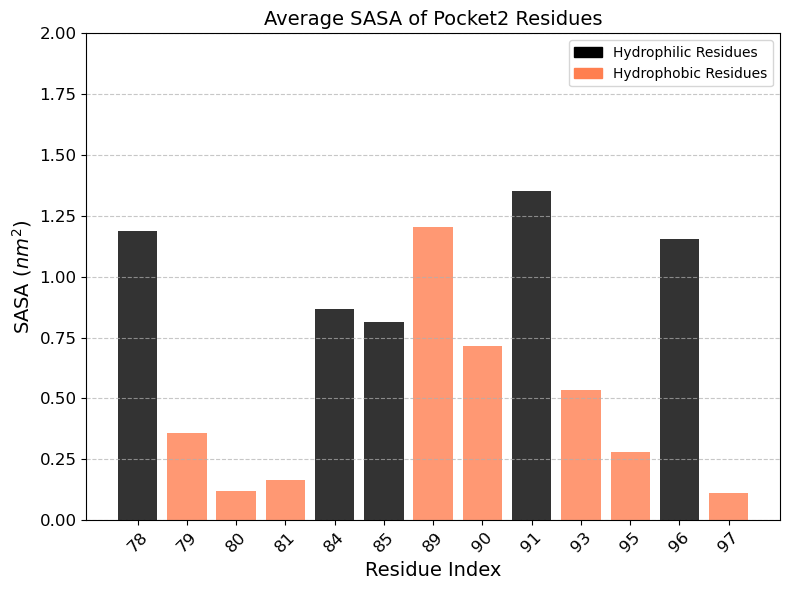

In [73]:
# Define the pocket residues
pocket = [78, 79, 80, 81, 84, 85, 89, 90, 91, 93, 95, 96, 97]
Hydrophillic= [84, 96, 78, 91, 85]

def plot_sasa_avg(data, output_file="sasa-avg"):
    """
    Plots SASA for pocket residues, highlighting hydrophilic residues in black.
    """
    residues = data[:, 0]
    sasa = data[:, 1]

    # Filter data to include only pocket residues
    pocket_indices = [i for i, res in enumerate(residues) if res in pocket]
    pocket_residues = residues[pocket_indices]
    pocket_sasa = sasa[pocket_indices]

    # Create a color array: 'black' for hydrophilic residues, 'coral' otherwise
    colors = ["black" if res in Hydrophillic else "coral" for res in pocket_residues]

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(pocket_residues)), pocket_sasa, color=colors, width=0.8, alpha=0.8)

    # Customize x-axis ticks to show residue numbers
    plt.xticks(
        ticks=range(len(pocket_residues)),  # Use indices as ticks
        labels=[int(res) for res in pocket_residues],  # Label with actual residue numbers
        rotation=45
    )


    # Add titles, labels, and grid
    plt.title("Average SASA of Pocket2 Residues", fontsize=14)
    plt.xlabel("Residue Index", fontsize=14)
    plt.ylabel(r"SASA $(nm^2)$", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 2)  # Adjust y-axis limits
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor="black", edgecolor="black", label="Hydrophilic Residues"),
        Patch(facecolor="coral", edgecolor="coral", label="Hydrophobic Residues")
    ]
    plt.legend(handles=legend_elements, fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.savefig(output_file, dpi=450, bbox_inches='tight', format='png')
    plt.show()

    
    
sasa_file = "6UMV-sasa-avg.xvg"

# Read the data from the .xvg file into numpy arrays
sasa_data = read_xvg(sasa_file)

# Plot the SASA data
plot_sasa_avg(sasa_data)